### 数据读取

In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt

matplotlib.matplotlib_fname()
%matplotlib inline

os.chdir(r"/Users/helefei/Documents/统计建模/3 数据分析项目/数据分析项目提交")
alldata = pd.read_csv('train.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (13,21,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 数据预处理

### （一）数据清理

In [3]:
# warning 排查
alldata.iloc[:,21].value_counts() 

0           905890
1           138982
2            39871
3            14552
0            13675
4             6586
5             3312
6             1921
1             1856
7              993
8              581
2              514
9              370
10             276
3              167
11             165
12             128
13              88
4               77
14              68
15              42
5               31
16              24
18              17
19              12
6               12
7               12
20              11
17              10
8                9
9                8
21               5
23               2
10               2
26               2
13               1
21               1
11               1
22               1
Jan-1996         1
27               1
30               1
32               1
35               1
36               1
58               1
Jan-1997         1
12               1
24               1
Name: delinq_2yrs, dtype: int64

In [4]:
# 问题是出在第788815行与第1068957行
print(alldata.loc[alldata['delinq_2yrs'].isin(['Jan-1997','Jan-1996']),:])

         Unnamed: 0  y  loan_amnt  funded_amnt  funded_amnt_inv        term  \
788815       788816  1       9200         9200         9200.000   36 months   
1068957     1068958  0      10000        10000         6592.916   36 months   

         int_rate  installment grade sub_grade  ... num_tl_op_past_12m  \
788815       7.07       284.37     A        A2  ...              100.0   
1068957     14.74       345.37     D        D3  ...                NaN   

        pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens  \
788815             0.0              0.0                  0.0  168271.0   
1068957            NaN              0.0                  0.0       NaN   

        tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
788815          21841.0           64200.0        14221.0   
1068957             NaN               NaN            NaN   

        total_il_high_credit_limit disbursement_method  
788815                         NaN                   N  
1068957              

In [5]:
# 查看第788815行与第1068957行数据，也把两行表现正常的数据放出来
alldata.iloc[[788814,788815,1068957,1068958],:]

,Unnamed: 0,y,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
788814,788815,0,5000,5000,5000.000,36 months,14.08,171.09,C,C3,...,4.0,90.0,66.7,0.0,0.0,400775.0,70401.0,7700.0,74875.0,Cash
788815,788816,1,9200,9200,9200.000,36 months,7.07,284.37,A,A2,...,100.0,0.0,0.0,0.0,168271.0,21841.0,64200.0,14221.0,NaN,N
1068957,1068958,0,10000,10000,6592.916,36 months,14.74,345.37,D,D3,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,N
1068958,1068959,0,10000,10000,4000.000,36 months,13.47,339.23,C,C4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Cash


In [6]:
alldata = alldata.drop([788815,1068957],axis=0)

In [7]:
# 由于这两行数据的输入问题，导致变量annual_inc,delinq_2yrs,total_acc本应是定量变量，现成为定性变量
# 我们修改这些变量的变量类型
alldata[['delinq_2yrs']] = alldata[['delinq_2yrs']].astype(float)
alldata[['total_acc']] = alldata[['total_acc']].astype(float)
alldata[['annual_inc']] = alldata[['annual_inc']].astype(float)

In [8]:
# 划分训练集与测试集，设置随机树种子random_state=1
# random_state=2
from sklearn.model_selection import train_test_split

y = alldata[['y']].astype(object)

X_train, X_test, y_train, y_test = train_test_split(
    alldata.drop(['y'],axis=1),y,test_size=1/3, random_state=2,stratify=y) 

X_train.iloc[0:5,]

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
729717,729718,16000,16000,16000.0,60 months,14.08,372.96,C,C3,Sales associate,...,0.0,93.1,60.0,0.0,0.0,91145.0,68861.0,23800.0,67345.0,Cash
1925,1926,5000,5000,5000.0,36 months,7.02,154.44,A,A2,Custodian,...,3.0,96.8,33.3,0.0,0.0,80228.0,29078.0,11900.0,18276.0,Cash
230624,230625,5000,5000,5000.0,36 months,19.03,183.36,D,D3,Captain,...,3.0,100.0,100.0,0.0,0.0,326938.0,75956.0,5000.0,71995.0,Cash
748357,748358,30000,30000,30000.0,36 months,10.91,980.89,B,B4,After Hours Hospice Nurse,...,4.0,72.5,0.0,0.0,0.0,287151.0,90571.0,9200.0,94585.0,Cash
876642,876643,7225,7225,7225.0,36 months,12.35,241.19,B,B4,HUNTINGTON HILLS CENTER FOR REHAB,...,2.0,100.0,100.0,0.0,0.0,42100.0,28738.0,17500.0,4000.0,Cash


### （二）目标变量分析

In [9]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753532 entries, 729717 to 336248
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   y       753532 non-null  object
dtypes: object(1)
memory usage: 11.5+ MB


In [10]:
y_train.iloc[:,0].value_counts(1)

0    0.867724
1    0.132276
Name: y, dtype: float64

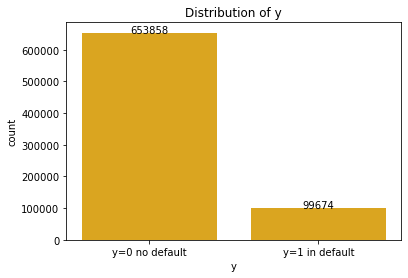

In [11]:
# 画y_train的分布图
ytrainname = ('y=0 no default','y=1 in default')
ytraincount = [653858,99674]

plt.figure()
plt.bar(ytrainname,ytraincount,color='goldenrod')
plt.xlabel('y')
plt.ylabel('count')
for x, y in enumerate(ytraincount): 
    plt.text(x, y + 100, '%s' % round(y, 1), ha='center')  
plt.title(r'Distribution of y')

plt.show()

### （三）初步筛选变量

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753532 entries, 729717 to 336248
Data columns (total 89 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  753532 non-null  int64  
 1   loan_amnt                   753532 non-null  int64  
 2   funded_amnt                 753532 non-null  int64  
 3   funded_amnt_inv             753532 non-null  float64
 4   term                        753532 non-null  object 
 5   int_rate                    753532 non-null  float64
 6   installment                 753532 non-null  float64
 7   grade                       753532 non-null  object 
 8   sub_grade                   753532 non-null  object 
 9   emp_title                   697962 non-null  object 
 10  emp_length                  704548 non-null  object 
 11  home_ownership              753532 non-null  object 
 12  annual_inc                  753531 non-null  float64
 13  verificat

In [13]:
# pymnt_plan方差几乎为0
X_train.iloc[:,14].value_counts()

n    753314
y       218
Name: pymnt_plan, dtype: int64

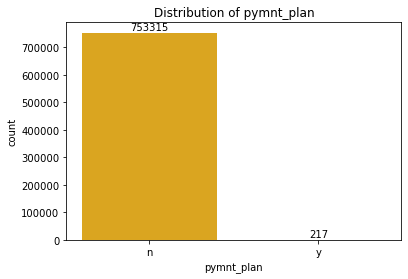

In [14]:
pymnt_plan = ('n','y')
pymnt_plancount = [753315,217]

plt.figure()
plt.bar(pymnt_plan,pymnt_plancount,color='goldenrod')
plt.xlabel('pymnt_plan')
plt.ylabel('count')
for x, y in enumerate(pymnt_plancount): 
    plt.text(x, y + 10000, '%s' % round(y, 1), ha='center')  
plt.title(r'Distribution of pymnt_plan')

plt.show()

In [15]:
# subgrade
X_train.iloc[:,8].value_counts()

C1    48761
B4    46753
B5    46520
B3    43786
C2    43509
C3    43079
C4    42706
B2    41988
B1    41811
C5    38884
A5    35867
A4    32087
A1    29003
D1    27490
A3    24312
D2    24300
A2    23189
D3    21554
D4    19054
D5    15877
E1    11108
E2     9992
E3     8931
E5     7555
E4     7494
F1     4393
F2     3103
F3     2569
F4     2135
F5     1727
G1     1354
G2      883
G3      647
G4      576
G5      535
Name: sub_grade, dtype: int64

In [16]:
# emp_title
X_train.iloc[:,9].value_counts()

Teacher                       12891
Manager                       11380
Owner                          7226
Registered Nurse               5125
Driver                         4976
                              ...  
Eccomerce personal shopper        1
Truck manager                     1
Pest control tech                 1
Functional Trainer                1
sugical tech/phliebotimist        1
Name: emp_title, Length: 217161, dtype: int64

In [17]:
# zip_code
X_train.iloc[:,17].value_counts()

945xx    8031
750xx    7959
112xx    7945
606xx    7033
300xx    6750
         ... 
696xx       1
643xx       1
510xx       1
205xx       1
506xx       1
Name: zip_code, Length: 916, dtype: int64

In [18]:
# 定义一个统计缺失值信息的函数
def missing_values_table(df):
    mis_val = df.isnull().sum() # 总缺失值
    mis_val_percent = 100 * df.isnull().sum() / len(df) # 缺失值比例
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1) # 缺失值制成表格
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing Values',
                                                               1:'% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values',ascending=False).round(1)
    # 缺失值比例列由大到小排序
    
    print('Your selected dataframe has {} columns.\nThere are {} columns that have missing values.'.format(df.shape[1], mis_val_table_ren_columns.shape[0]))
    # 打印缺失值信息
    
    return mis_val_table_ren_columns

In [19]:
# 训练集中自变量缺失情况
missing_values_table(X_train)

Your selected dataframe has 89 columns.
There are 65 columns that have missing values.


,Missing Values,% of Total Values
dti_joint,713367,94.7
annual_inc_joint,713365,94.7
mths_since_last_record,634042,84.1
mths_since_recent_bc_dlq,580248,77.0
il_util,356642,47.3
...,...,...
delinq_2yrs,9,0.0
open_acc,9,0.0
inq_last_6mths,9,0.0
earliest_cr_line,9,0.0


In [20]:
X_train = X_train.drop(['Unnamed: 0','title','earliest_cr_line','pymnt_plan',
                  'sub_grade','emp_title','zip_code','dti_joint',
                  'annual_inc_joint'],axis=1)

X_test = X_test.drop(['Unnamed: 0','title','earliest_cr_line','pymnt_plan',
                  'sub_grade','emp_title','zip_code','dti_joint',
                  'annual_inc_joint'],axis=1)

In [21]:
# 获取缺失值比例 > 90% 的列，dti_joint,annual_inc_joint
missing_df = missing_values_table(X_train)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 90].index)

# 删除缺失值比例高于90%的列
X_train = X_train.drop(columns = list(missing_columns))
# 在测试集中进行同样的操作
X_test = X_test.drop(columns = list(missing_columns))

Your selected dataframe has 80 columns.
There are 60 columns that have missing values.


### （四）变量取值变换

In [22]:
# 将有序数值grade,emp_length映射为整数
mapping_dict={
    'emp_length':{
        '10+ years':10,
        '9 years':9,
        '8 years':8,
        '7 years':7,
        '6 years':6,
        '5 years':5,
        '4 years':4,
        '3 years':3,
        '2 years':2,
        '1 year':1,
        '< 1 year':0,
    },
    'grade':{
        'A':1,
        'B':2,
        'C':3,
        'D':4,
        'E':5,
        'F':6,
        'G':7
    }
}

In [23]:
X_train = X_train.replace(mapping_dict)
X_test = X_test.replace(mapping_dict)

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753532 entries, 729717 to 336248
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   753532 non-null  int64  
 1   funded_amnt                 753532 non-null  int64  
 2   funded_amnt_inv             753532 non-null  float64
 3   term                        753532 non-null  object 
 4   int_rate                    753532 non-null  float64
 5   installment                 753532 non-null  float64
 6   grade                       753532 non-null  int64  
 7   emp_length                  704548 non-null  float64
 8   home_ownership              753532 non-null  object 
 9   annual_inc                  753531 non-null  float64
 10  verification_status         753532 non-null  object 
 11  purpose                     753532 non-null  object 
 12  addr_state                  753532 non-null  object 
 13  dti      

In [353]:
# lighgbm模型，将字符串转化为数字
#找出类别变量
from sklearn.preprocessing import LabelEncoder
categorical_features = np.where(X_train.dtypes == np.object)[0]
class_le = LabelEncoder()
#用class_le.fit_transform将其转换（因为y也需要转换，所以这里对整个alldata进行处理）
for i in categorical_features:
    X_train.iloc[:,i] = class_le.fit_transform(X_train.iloc[:,i].values)
    X_test.iloc[:,i] = class_le.fit_transform(X_test.iloc[:,i].values)
X_train.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int64
int_rate                      float64
                               ...   
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
disbursement_method             int64
Length: 80, dtype: object

In [354]:
#应对定性变量类型进行设置，因为前面LabelEncoder处理后类型变为数值型了（非常重要！）   
X_train.iloc[:,categorical_features] = X_train.iloc[:,categorical_features].astype('category')
X_test.iloc[:,categorical_features] = X_test.iloc[:,categorical_features].astype('category')
X_train.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                          category
int_rate                       float64
                                ...   
tot_hi_cred_lim                float64
total_bal_ex_mort              float64
total_bc_limit                 float64
total_il_high_credit_limit     float64
disbursement_method           category
Length: 80, dtype: object

### （五）缺失值插补

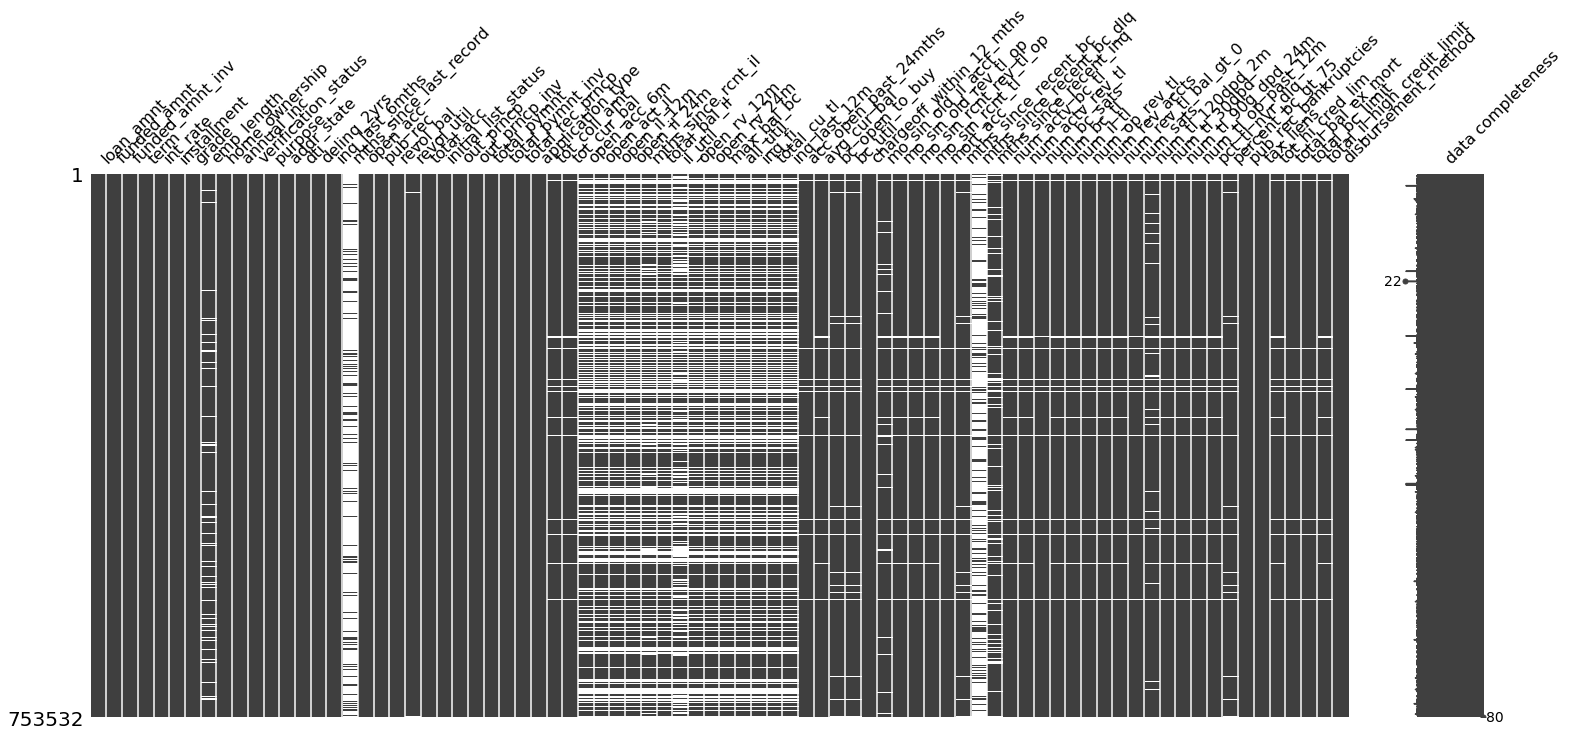

In [25]:
# 缺失值可视化
import missingno as msno
msno.matrix(X_train, labels=True)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numeric_features = np.where(X_train.dtypes != np.object)[0]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])


categorical_features = np.where(X_train.dtypes == np.object)[0]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing'))])

In [27]:
missing_pre = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [28]:
X_train_imp = pd.DataFrame(missing_pre.fit_transform(X_train))#定量变量放在前，后面为定性变量

In [29]:
# 将缺失值插补方法应用到测试集上去
X_test_imp = pd.DataFrame(missing_pre.fit_transform(X_test))#定量变量放在前，后面为定性变量

In [365]:
# 重新命名变量
X_train_imp.columns=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'emp_length','annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_record', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp',  'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit','term','home_ownership',
       'verification_status','purpose', 'addr_state','initial_list_status',
       'application_type','disbursement_method' ]

In [366]:
X_test_imp.columns=X_train_imp.columns

In [370]:
X_train_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753532 entries, 0 to 753531
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   753532 non-null  float64
 1   funded_amnt                 753532 non-null  float64
 2   funded_amnt_inv             753532 non-null  float64
 3   int_rate                    753532 non-null  float64
 4   installment                 753532 non-null  float64
 5   grade                       753532 non-null  float64
 6   emp_length                  753532 non-null  float64
 7   annual_inc                  753532 non-null  float64
 8   dti                         753532 non-null  float64
 9   delinq_2yrs                 753532 non-null  float64
 10  inq_last_6mths              753532 non-null  float64
 11  mths_since_last_record      753532 non-null  float64
 12  open_acc                    753532 non-null  float64
 13  pub_rec       

In [377]:
# 变量的类型也发生了变化，我们调整过来
for i in range(0,72):
    X_train_imp.iloc[:,i] = X_train_imp.iloc[:,i].astype(float)
    X_test_imp.iloc[:,i] = X_test_imp.iloc[:,i].astype(float)
X_train_imp.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,...,total_bc_limit,total_il_high_credit_limit,term,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type,disbursement_method
0,16000.0,16000.0,16000.0,1.0,14.08,372.96,3.0,7.0,4.0,56000.0,...,0.0,93.1,60.0,0.0,0.0,91145.0,68861.0,23800.0,67345.0,0.0
1,5000.0,5000.0,5000.0,0.0,7.02,154.44,1.0,10.0,1.0,58000.0,...,3.0,96.8,33.3,0.0,0.0,80228.0,29078.0,11900.0,18276.0,0.0
2,5000.0,5000.0,5000.0,0.0,19.03,183.36,4.0,6.0,1.0,120000.0,...,3.0,100.0,100.0,0.0,0.0,326938.0,75956.0,5000.0,71995.0,0.0
3,30000.0,30000.0,30000.0,0.0,10.91,980.89,2.0,7.0,1.0,98000.0,...,4.0,72.5,0.0,0.0,0.0,287151.0,90571.0,9200.0,94585.0,0.0
4,7225.0,7225.0,7225.0,0.0,12.35,241.19,2.0,7.0,4.0,41000.0,...,2.0,100.0,100.0,0.0,0.0,42100.0,28738.0,17500.0,4000.0,0.0


In [378]:
X_train_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753532 entries, 0 to 753531
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   753532 non-null  float64
 1   funded_amnt                 753532 non-null  float64
 2   funded_amnt_inv             753532 non-null  float64
 3   int_rate                    753532 non-null  float64
 4   installment                 753532 non-null  float64
 5   grade                       753532 non-null  float64
 6   emp_length                  753532 non-null  float64
 7   annual_inc                  753532 non-null  float64
 8   dti                         753532 non-null  float64
 9   delinq_2yrs                 753532 non-null  float64
 10  inq_last_6mths              753532 non-null  float64
 11  mths_since_last_record      753532 non-null  float64
 12  open_acc                    753532 non-null  float64
 13  pub_rec       

In [ ]:
for i in [72,73,74,75,76,77,78,79,80]:
    X_train_imp.iloc[:,i] = X_train_imp.iloc[:,i].astype(object)
    X_test_imp.iloc[:,i] = X_test_imp.iloc[:,i].astype(object)
X_train_imp.head()

### （六）构造虚拟变量

In [369]:
# 采用独热编码
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(handle_unknown='ignore') 
#获得定性变量所在列号
categorical_features = np.where(X_train_imp.dtypes == np.object)[0] 
categorical_features

array([], dtype=int64)

In [137]:
X_train_cat_onehot = pd.DataFrame(onehot.fit_transform(X_train_imp.iloc[:,categorical_features]).toarray()) 
#必须加上.toarray()转化为矩阵

In [141]:
# 应用于测试集
X_test_cat_onehot = pd.DataFrame(onehot.transform(X_test_imp.iloc[:,categorical_features]).toarray())

In [144]:
# 借用get_dummies编码后的变量
X_train_dum = pd.get_dummies(X_train_imp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753532 entries, 0 to 753531
Columns: 154 entries, loan_amnt to disbursement_method_DirectPay
dtypes: float64(72), uint8(82)
memory usage: 472.9 MB


In [150]:
#倒是可以借用get_dummies中的变量名
X_train_cat_onehot.columns = X_train_dum.columns[72:]
X_train_cat_onehot.head()

,term_ 36 months,term_ 60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [151]:
# 修改测试集中的变量名
X_test_cat_onehot.columns = X_train_dum.columns[72:]
X_test_cat_onehot.head()

,term_ 36 months,term_ 60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [157]:
X_train_imp.iloc[:5,0:72]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,term
0,24000.0,24000.0,24000.0,15.59,578.42,3.0,2.0,58000.00,27.52,4.0,...,0.0,80.0,66.7,0.0,0.0,48502.0,19556.0,9000.0,37402.0,60 months
1,15000.0,15000.0,15000.0,14.07,513.18,3.0,8.0,93257.00,25.97,0.0,...,1.0,100.0,0.0,0.0,0.0,91665.0,64027.0,5500.0,63335.0,36 months
2,33400.0,33400.0,33400.0,13.49,768.36,3.0,7.0,115000.00,19.76,0.0,...,1.0,100.0,0.0,0.0,0.0,701900.0,213213.0,60800.0,30000.0,60 months
3,9400.0,9400.0,9400.0,21.45,356.33,4.0,3.0,26151.96,16.52,5.0,...,2.0,79.2,20.0,0.0,0.0,59846.0,56039.0,4200.0,54046.0,36 months
4,3000.0,3000.0,3000.0,12.74,100.71,3.0,8.0,65000.00,27.13,1.0,...,2.0,91.5,100.0,0.0,0.0,81855.0,54424.0,21100.0,36455.0,36 months


In [160]:
# 整合定量变量与定性变量
X_train_pre = pd.concat([X_train_imp.iloc[:,0:72],X_train_cat_onehot],axis=1)
X_test_pre = pd.concat([X_test_imp.iloc[:,0:72],X_test_cat_onehot],axis=1)

In [161]:
X_train_pre.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
0,24000.0,24000.0,24000.0,15.59,578.42,3.0,2.0,58000.00,27.52,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,15000.0,15000.0,15000.0,14.07,513.18,3.0,8.0,93257.00,25.97,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,33400.0,33400.0,33400.0,13.49,768.36,3.0,7.0,115000.00,19.76,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,9400.0,9400.0,9400.0,21.45,356.33,4.0,3.0,26151.96,16.52,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,3000.0,3000.0,3000.0,12.74,100.71,3.0,8.0,65000.00,27.13,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [162]:
X_train_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753532 entries, 0 to 753531
Columns: 154 entries, loan_amnt to disbursement_method_DirectPay
dtypes: float64(154)
memory usage: 885.3 MB


## LU公司信贷数据模型的建立、优化与解释

### （一）XGBoost模型建立、优化与解释

In [252]:
# 之前变量类型换来换去，都弄晕了，用相同的随机数种子重新找到之前的y_test
y = alldata[['y']].astype(object)

X_trainw, X_testw, y_train, y_test = train_test_split(
    alldata.drop(['y'],axis=1),y,test_size=1/3, random_state=1,stratify=y) 

In [253]:
# 不进行参数优化，尝试观察模型效果
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
import xgboost as xgb
from xgboost import XGBClassifier
xgb0 = xgb.XGBClassifier(learning_rate=0.1,max_depth=6,
objective='binary:logistic', random_state=1)

xgb0 = xgb0.fit(X_train_pre,y_train)
y_pred0 = xgb0.predict(X_test_pre)
y_predproba0 = xgb0.predict_proba(X_test_pre) 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [269]:
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [274]:
print(classification_report(y_true=y_test.astype('str').values,y_pred=y_pred0.astype('str')))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    326929
           1       1.00      0.87      0.93     49837

    accuracy                           0.98    376766
   macro avg       0.99      0.93      0.96    376766
weighted avg       0.98      0.98      0.98    376766



In [305]:
f1_score(y_true=y_test.astype('int').values,y_pred=y_pred0.astype('int'))

0.9303108975046667

In [272]:
confusion_matrix(y_true=y_test.astype('str').values,y_pred=y_pred0.astype('str'))

array([[326911,     18],
       [  6478,  43359]])

Text(0.5, 1.0, 'ROC curve: AUC=0.98')

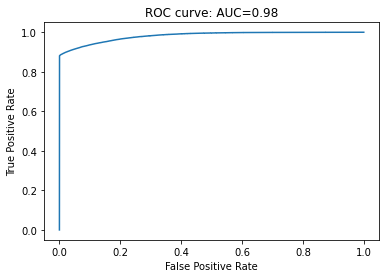

In [284]:
from sklearn.metrics import roc_curve,RocCurveDisplay,auc
fpr, tpr, shreshold = roc_curve(y_test.astype('int').values.ravel(),y_predproba0[:,1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc1 = auc(fpr, tpr) #获得AUC的另一种方法
roc_display.ax_.set_title('ROC curve: ' 'AUC={0:0.2f}'.format(auc1))

In [298]:
#采用交叉验证选取最优参数，这里选取learning_rate,n_estimators,max_depth
from sklearn.model_selection import GridSearchCV, KFold

xgb1 = xgb.XGBClassifier(learning_rate=0.1,max_depth=6,
objective='binary:logistic', random_state=1,scale_pos_weight=6)
    
param_grid=[{'xgb1__n_estimators':[100, 300, 500],
             'xgb1__learning_rate':[0.05,0.1],
             'xgb1__max_depth':[4,6,8]}] #一定要注意clf后面是两根下划线！

gs = GridSearchCV(estimator=xgb1,
               param_grid=param_grid,
               scoring='f1',
               cv=KFold(n_splits=2, random_state=1, shuffle=True))
gs = gs.fit(X_train_pre,y_train.astype('int').values)

[23:29:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { xgb1__learning_rate, xgb1__max_depth, xgb1__n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:34:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { xgb1__learning_rate, xgb1__max_depth, xgb1__n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:39:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { xgb1__learning_rate, xgb1__max_depth, xgb1__n_estimators } might not be used.

  This may not be acc

[01:13:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { xgb1__learning_rate, xgb1__max_depth, xgb1__n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:18:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { xgb1__learning_rate, xgb1__max_depth, xgb1__n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:23:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { xgb1__learning_rate, xgb1__max_depth, xgb1__n_estimators } might not be used.

  This may not be acc

In [299]:
gs.best_params_ #最佳参数组合

{'xgb1__learning_rate': 0.05, 'xgb1__max_depth': 4, 'xgb1__n_estimators': 100}

In [300]:
gs.best_score_ #最佳参数组合下的f1_score

0.9285630087287087

In [301]:
gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              xgb1__learning_rate=0.05, xgb1__max_depth=4,
              xgb1__n_estimators=100)

In [302]:
#使用最优参数做预测
xgb1 = gs.best_estimator_
xgb1.fit(X_test_pre, y_test)
y_pred1 = xgb1.predict(X_test_pre)
y_predproba1 = xgb1.predict_proba(X_test_pre) 

[09:24:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { xgb1__learning_rate, xgb1__max_depth, xgb1__n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




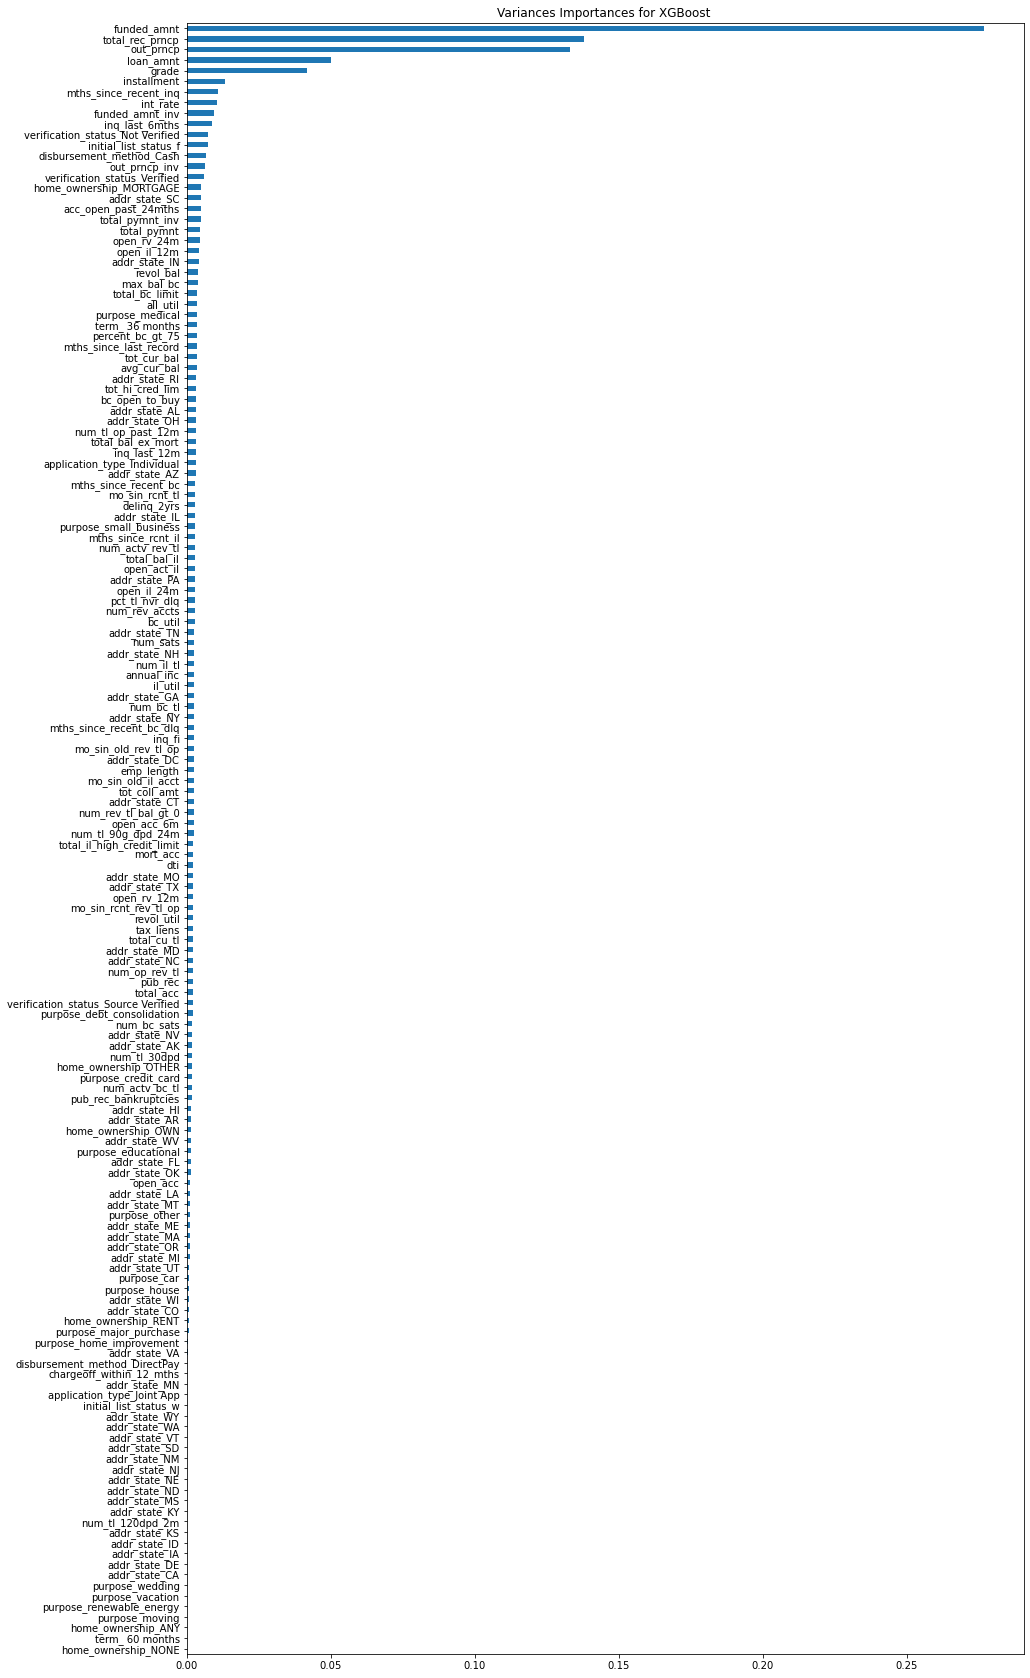

In [315]:
import matplotlib.pyplot as plt
xgb1_importance = pd.Series(xgb1.feature_importances_,index = X_train_pre.columns, name = 'Var')

plt.figure(figsize=(15,30))
xgb1_importance.sort_values().plot(kind='barh')
plt.title("Variances Importances for XGBoost ")
plt.savefig('/Users/helefei/Documents/统计建模/3 数据分析项目/数据分析项目提交/XGBoost最优模型变量重要性图.png')

In [316]:
# 混淆矩阵
confusion_matrix(y_true=y_test.astype('str').values,y_pred=y_pred1.astype('str'))

array([[326705,    224],
       [  5708,  44129]])

In [318]:
# f1_score
f1_score(y_true=y_test.astype('int').values,y_pred=y_pred1.astype('int'))

0.9370209151714619

In [319]:
print(classification_report(y_true=y_test.astype('str').values,y_pred=y_pred1.astype('str')))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    326929
           1       0.99      0.89      0.94     49837

    accuracy                           0.98    376766
   macro avg       0.99      0.94      0.96    376766
weighted avg       0.98      0.98      0.98    376766



Text(0.5, 1.0, 'ROC curve: AUC=0.99')

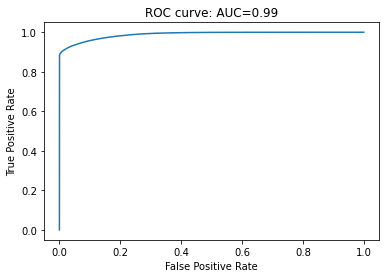

In [320]:
# roc curve
from sklearn.metrics import roc_curve,RocCurveDisplay,auc
fpr, tpr, shreshold = roc_curve(y_test.astype('int').values.ravel(),y_predproba1[:,1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc1 = auc(fpr, tpr) #获得AUC的另一种方法
roc_display.ax_.set_title('ROC curve: ' 'AUC={0:0.2f}'.format(auc1))

In [ ]:
#重复留出法


### （二）lightGBM模型建立、优化与解释

In [326]:
# 不进行参数优化，尝试观察模型效果
from lightgbm import LGBMRegressor,LGBMClassifier

lgb0 = LGBMClassifier(objective='binary',learning_rate = 0.1,
                      n_estimators = 150,  num_leaves=20)

lgb0 = lgb0.fit(X_train,y_train.astype('int').values)
lgby_pred0 = lgb0.predict(X_test)
lgby_predproba0 = lgb0.predict_proba(X_test) 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [327]:
f1_score(y_true=y_test.astype('int').values,y_pred=lgby_pred0.astype('int'))

0.9332520638179563

In [328]:
confusion_matrix(y_true=y_test.astype('int').values,y_pred=lgby_pred0.astype('int'))

array([[326887,     42],
       [  6200,  43637]])

Text(0.5, 1.0, 'ROC curve: AUC=0.98')

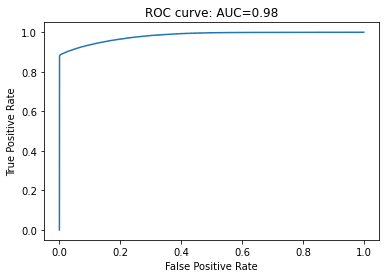

In [329]:
from sklearn.metrics import roc_curve,RocCurveDisplay,auc
fpr, tpr, shreshold = roc_curve(y_test.astype('int').values.ravel(),lgby_predproba0[:,1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc1 = auc(fpr, tpr) #获得AUC的另一种方法
roc_display.ax_.set_title('ROC curve: ' 'AUC={0:0.2f}'.format(auc1))

In [331]:
# 网格搜索，参数优化
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

lgb0 = LGBMClassifier(objective='binary',learning_rate = 0.1,
                      n_estimators = 150, num_leaves=20,is_unbalance=True)


param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [150,500],
    'num_leaves':[12,20],
}
gs = GridSearchCV(lgb0, param_grid,cv=StratifiedKFold(n_splits=2, random_state=1, shuffle=True))
gs.fit(X_train, y_train.astype('int').values,eval_metric='f1_score')
print('Best parameters found by grid search are:', gs.best_params_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best parameters found by grid search are: {'learning_rate': 0.05, 'n_estimators': 150, 'num_leaves': 20}


In [332]:
gs.best_params_ #最佳参数组合

{'learning_rate': 0.05, 'n_estimators': 150, 'num_leaves': 20}

In [333]:
gs.best_score_ #最佳参数组合下的f1_score

0.9823776561579336

In [334]:
gs.best_estimator_

LGBMClassifier(is_unbalance=True, learning_rate=0.05, n_estimators=150,
               num_leaves=20, objective='binary')

In [337]:
#使用最优参数做预测
lgb1 = gs.best_estimator_
lgb1.fit(X_test, y_test.astype('int').values)
lgby_pred1 = lgb1.predict(X_test)
lgby_predproba1 = lgb1.predict_proba(X_test) 

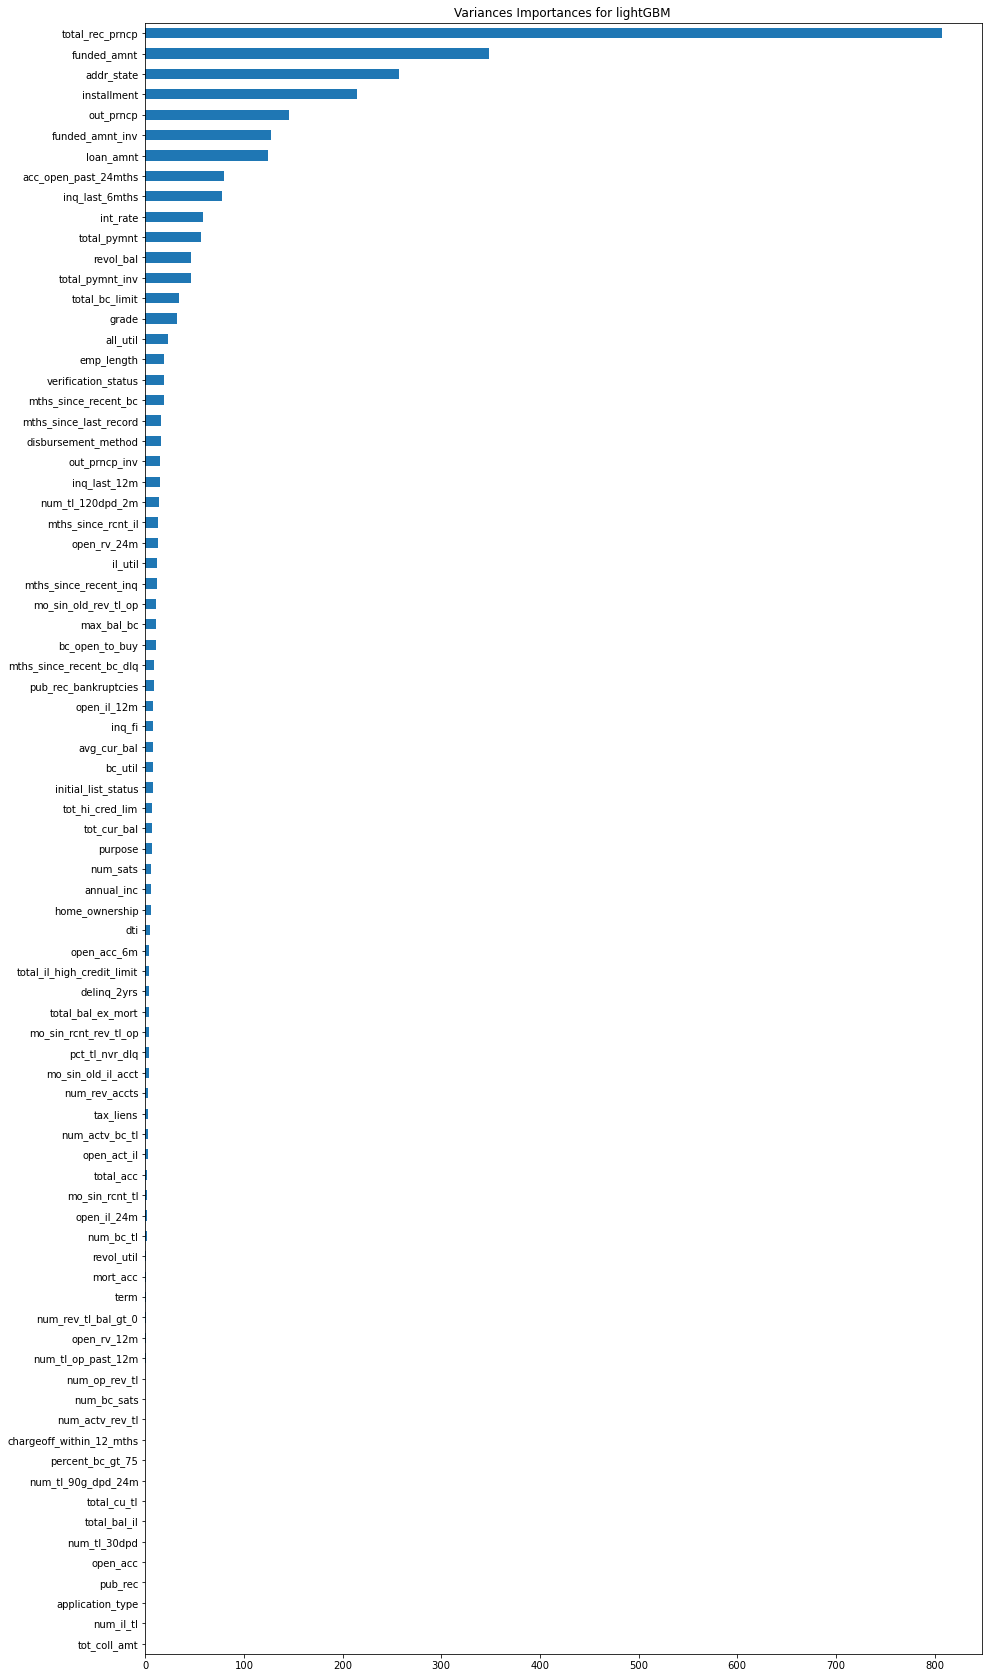

In [338]:
# variance importance
import matplotlib.pyplot as plt
lgb1_importance = pd.Series(lgb1.feature_importances_,index = X_train.columns, name = 'Var')

plt.figure(figsize=(15,30))
lgb1_importance.sort_values().plot(kind='barh')
plt.title("Variances Importances for lightGBM ")
plt.savefig('/Users/helefei/Documents/统计建模/3 数据分析项目/数据分析项目提交/lightGBM最优模型变量重要性图.png')

In [355]:
# random state=2
lgb2 = LGBMClassifier(is_unbalance=True, learning_rate=0.05, n_estimators=150,
               num_leaves=20, objective='binary')

lgb2 = lgb2.fit(X_train,y_train.astype('int').values)
lgby_pred2 = lgb2.predict(X_test)
lgby_predproba2 = lgb2.predict_proba(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [356]:
# 混淆矩阵
confusion_matrix(y_true=y_test.astype('str').values,y_pred=lgby_pred2.astype('str'))


array([[326600,    329],
       [  6091,  43746]])

In [357]:
# f1_score
f1_score(y_true=y_test.astype('int').values,y_pred=lgby_pred2.astype('int'))

0.931638129312548

In [358]:
print(classification_report(y_true=y_test.astype('str').values,y_pred=lgby_pred2.astype('str')))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    326929
           1       0.99      0.88      0.93     49837

    accuracy                           0.98    376766
   macro avg       0.99      0.94      0.96    376766
weighted avg       0.98      0.98      0.98    376766



Text(0.5, 1.0, 'ROC curve: AUC=0.98')

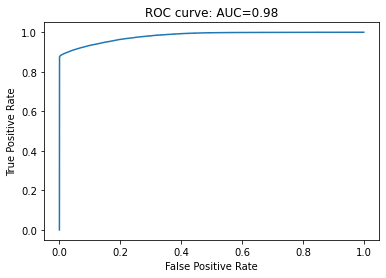

In [359]:
# roc curve
from sklearn.metrics import roc_curve,RocCurveDisplay,auc
fpr, tpr, shreshold = roc_curve(y_test.astype('int').values.ravel(),lgby_predproba2[:,1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc1 = auc(fpr, tpr) #获得AUC的另一种方法
roc_display.ax_.set_title('ROC curve: ' 'AUC={0:0.2f}'.format(auc1))